#Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Get Data (run once)

In [ ]:
# upload kaggle file
from google.colab import files
files.upload()

{}

In [ ]:
# Install kaggle package
!pip install --upgrade --force-reinstall --no-deps kaggle

# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # set permission

     |████████████████████████████████| 58 kB 3.9 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=b42e85174ca3b4d6c2897762b83c4332051de6148a97a48a0d70f7766ce447f9
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Use with option -p to choose the destination
!kaggle datasets download -d imakash3011/customer-personality-analysis -p /content/gdrive/MyDrive/DATASET/CUSTOMER_PERSONALITY

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# Now you can Unzip it!
# !unzip -q <SOURCE-PATH> -d <DESTINATION-PATH>

!unzip -q /content/gdrive/MyDrive/DATASET/CUSTOMER_PERSONALITY/customer-personality-analysis.zip -d /content/gdrive/MyDrive/DATASET/CUSTOMER_PERSONALITY

replace /content/gdrive/MyDrive/DATASET/CUSTOMER_PERSONALITY/marketing_campaign.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


#Import libraries

In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

from datetime import datetime

pd.options.display.float_format = "{:.2f}".format

# !pip install dataprep
# from dataprep.eda import plot, plot_correlation, create_report, plot_missing

#Dataset Overview

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/DATASET/CUSTOMER_PERSONALITY/marketing_campaign.csv',sep = "\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


##**Attributes**

*People*


ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

---

Products


MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

---
Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

---
Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

##Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


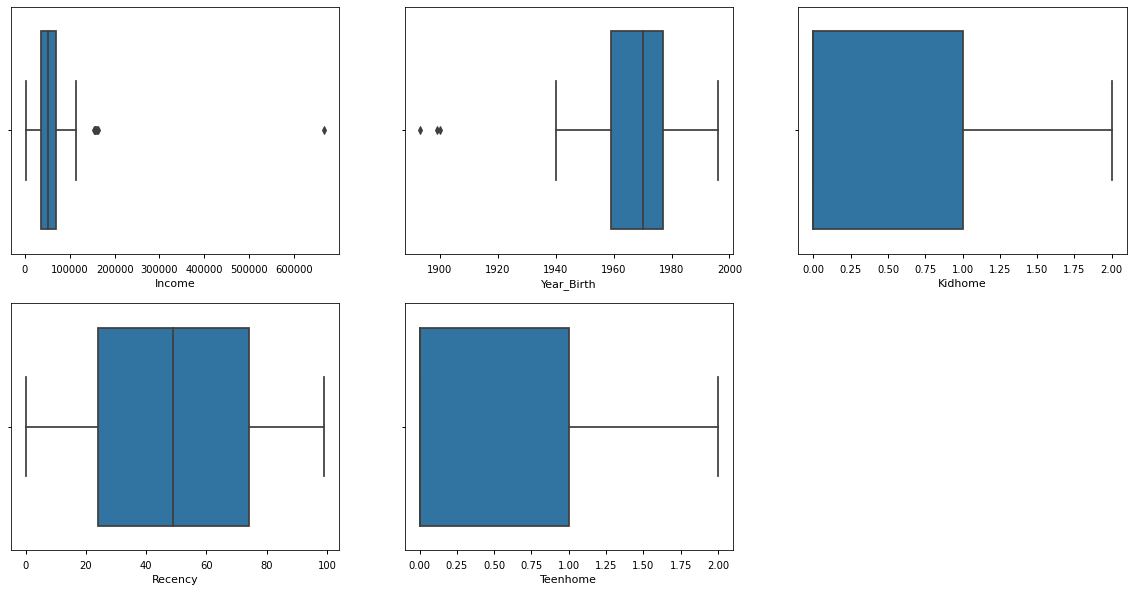

In [6]:
dt_list1 = ['Income','Year_Birth','Kidhome','Recency','Teenhome']

plt.figure(figsize=(20,10))
for i in range(len(dt_list1)):
    subplot_i = 231
    plt.subplot(subplot_i+i)
    sns.boxplot(data=df,x=dt_list1[i])
plt.show()

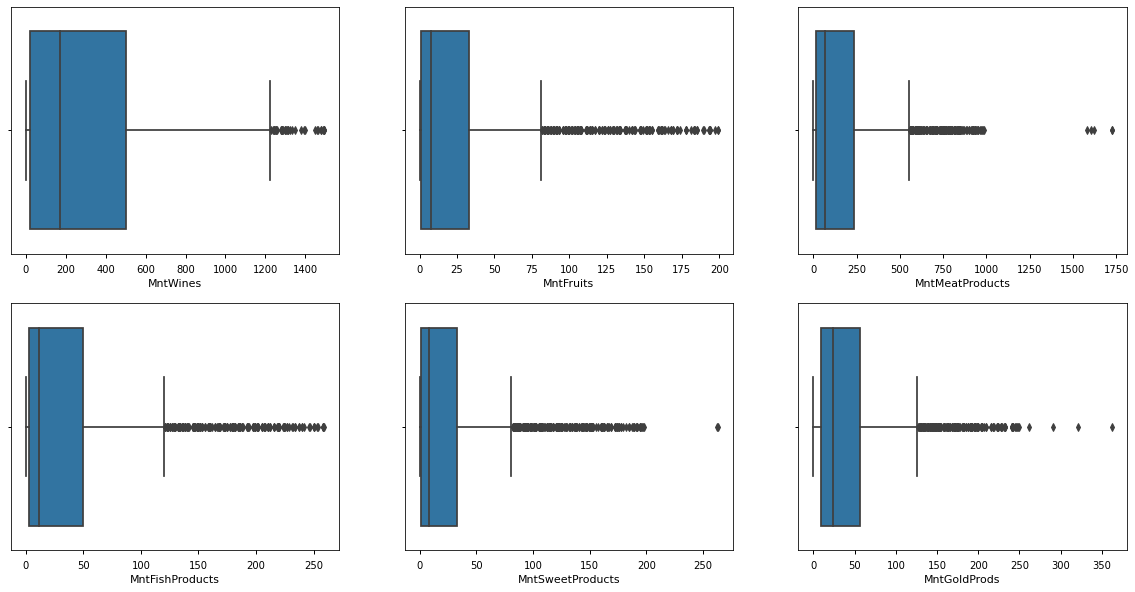

In [7]:
dt_list2 = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
plt.figure(figsize=(20,10))
for i in range(len(dt_list2)):
    subplot_i = 231
    plt.subplot(subplot_i+i)
    sns.boxplot(data=df,x=dt_list2[i])
plt.show()


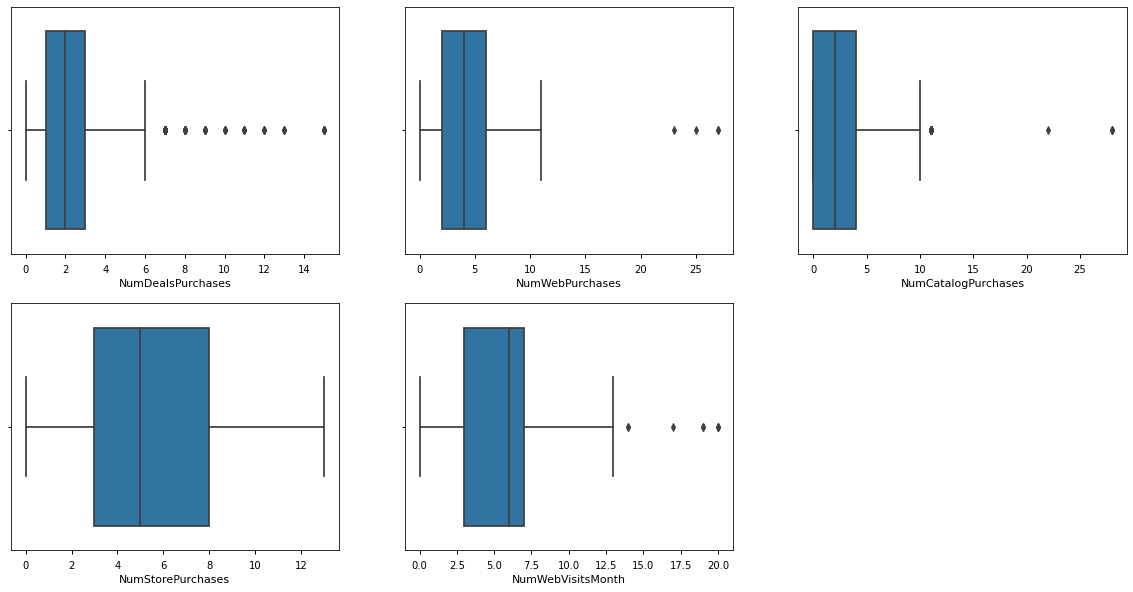

In [8]:
dt_list2 = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
plt.figure(figsize=(20,10))
for i in range(len(dt_list2)):
    subplot_i = 231
    plt.subplot(subplot_i+i)
    sns.boxplot(data=df,x=dt_list2[i])
plt.show()

##Clean Data

In [4]:
#check duplicated row
df.duplicated().sum()

0

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
#Drop columns 'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations 
# => drop these two column because they will not contribute anything in learning process of the model.
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [10]:
# Income's upper n lower whisker
q1_income = df['Income'].quantile(0.25)
q3_income = df['Income'].quantile(0.75)

iqr_income = q3_income - q1_income

lower_income = q1_income - 1.5*iqr_income
upper_income = q3_income + 1.5*iqr_income
print(lower_income)
print(upper_income)

-14525.5
118350.5


In [10]:
#Create Age of customer Column, since the data is collected within 2 year since 2014 so I'll use that to calculate
age_col = 2014 - df['Year_Birth']
df.insert(2,'Age',age_col)

In [12]:
# Year_Birth's upper n lower whisker 
q1_birth = df['Year_Birth'].quantile(0.25)
q3_birth = df['Year_Birth'].quantile(0.75)

iqr_birth = q3_birth - q1_birth

lower_birth = q1_birth - 1.5*iqr_birth
upper_birth = q3_birth + 1.5*iqr_birth
print(lower_birth)
print(upper_birth)

1932.0
2004.0


In [11]:
# Drop outliers
df.drop(df[df['Year_Birth']<1932].index,axis=0,inplace=True)
df.drop(df[df['Income']>118350].index,axis=0,inplace=True)

#Fill NaN with mean value
df['Income'] = df['Income'].fillna(df['Income'].mean())

#Combine 2 columns Kidhome and Teenhome to only 1 column: Children then drop them. 
df['Children'] = df['Kidhome'] + df['Teenhome']
df.drop(columns=['Kidhome','Teenhome'],inplace=True)

In [12]:
#Change column Dt_Customer to datetime type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)
df['Month'] = df['Dt_Customer'].dt.month
df['Year'] = df['Dt_Customer'].dt.year
df['YearMonth'] = df['Dt_Customer'].map(lambda date: 100*date.year + date.month)

In [12]:
df['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

Dt_Customer data is not full in July 2012 so I'll drop these rows.

In [13]:
df.drop(df[df['YearMonth']==201207].index,axis=0,inplace=True)

Features Engineering

In [14]:
#Create more columns
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df ['NumStorePurchases']
df['TotalProducts'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp3']+ df['AcceptedCmp4']+ df['AcceptedCmp5']+ df['AcceptedCmp1']+ df['AcceptedCmp2']

In [15]:
# #Create column if customer accepts at least 1 campaign => 1, otherwise 0
df['AtLeast1Cmp'] = 0
df.loc[df['TotalAcceptedCmp']>0,'AtLeast1Cmp'] = 1

In [16]:
#Rename Products columns
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# Alone/YOLO/Absurd is considered single so I'll change them to Single
df['Marital_Status'].replace({'Alone':'Single','YOLO':'Single','Absurd':'Single'},inplace=True)

# Change 2n Cycle to Master
df['Education'].replace({'2n Cycle':'Master'},inplace=True)

In [17]:
# Divide Income and Age to groups and compute new columns.

#Income group
category_income = pd.cut(df['Income'],bins=[0,35000,51000,68000,115000],labels=['Low Income','Lower Middle','Upper Middle','High Income'])
df.insert(5,'Income Group',category_income)
#Age group
category_age = pd.cut(df['Age'],bins=[0,39,59,99],labels=['Young Adult','Middle Aged','Old Adult'])
df.insert(2,'Age Group',category_age)

In [18]:
#Drop unsused columns
df.drop(columns=['Year_Birth','Dt_Customer'],inplace=True)

In [72]:
df.head()

,ID,Age Group,Age,Education,Marital_Status,Income Group,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Month,Year,YearMonth,TotalPurchases,TotalProducts,TotalAcceptedCmp,AtLeast1Cmp
0,5524,Middle Aged,57,Graduation,Single,Upper Middle,58138.00,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,9,2012,201209,22,1617,0,0
1,2174,Old Adult,60,Graduation,Single,Lower Middle,46344.00,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3,2014,201403,4,27,0,0
2,4141,Middle Aged,49,Graduation,Together,High Income,71613.00,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,8,2013,201308,20,776,0,0
3,6182,Young Adult,30,Graduation,Together,Low Income,26646.00,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,2,2014,201402,6,53,0,0
4,5324,Young Adult,33,PhD,Married,Upper Middle,58293.00,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,1,2014,201401,14,422,0,0


# Exploratory Data Analysis

* Marital Status: Married Customer account for >38% of the dataset, followed by Customer with 'Together' status (>25%) and Single (~21%)

* Education Background: Half of the customers have Graduation background while Master(25%) and PhD (21%) follow each other very closely at 2nd and 3rd place,only a very small percentage for Basic background 

=> This company has quite high knowledge customers that are not alone :D.

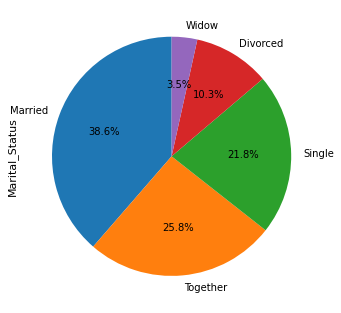

In [23]:
df['Marital_Status'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', startangle=90, fontsize=10)

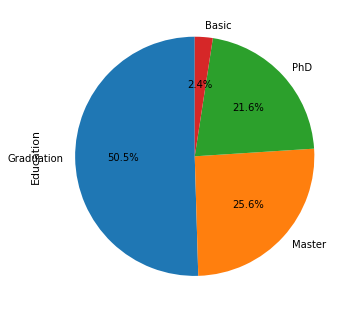

In [24]:
df['Education'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', startangle=90, fontsize=10)

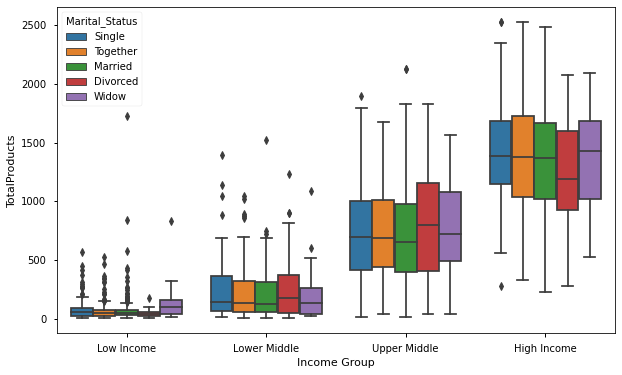

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Income Group',y='TotalProducts',hue='Marital_Status');

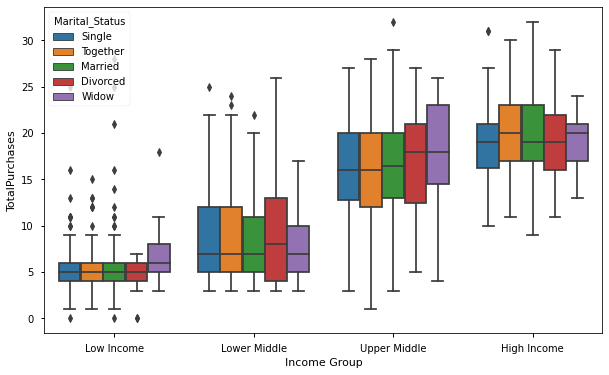

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Income Group',y='TotalPurchases',hue='Marital_Status');

####What kind of products have been purchased the most among Marital Status and Education groups?

Mean  of each product that Marital Status and Education group have purchased in the last 2 years.
- Wines: Customers with PhD (Married/Widow) background purchase the most wines (amounnt approximately 500) while the ones with Basic education background barely purchase anything.
- Fruits: except for Widow group with Master degree who buys the most (amount of 40), the rest of the group with Graduation degree buy the most fruit with the mean of amount ~ 33
- Meat: Customer with Basic education purchase the least  while customer with Master degree purchase more than 200 in the past 2 years.
- Fish: there is a significant rise in the Widow-Master degree column.
- Sweets and Gold: Widow customer tends to buy more sweet than other groups (especialy people who got Graduation and Master Degree)


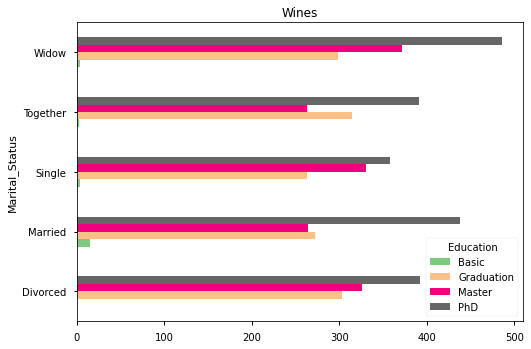

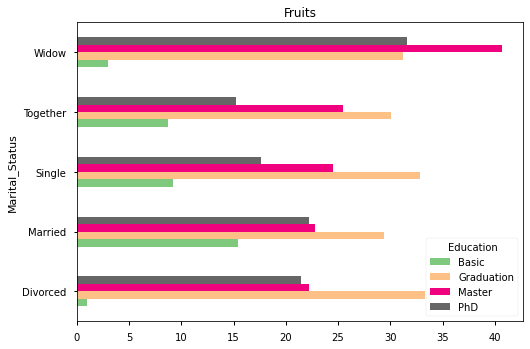

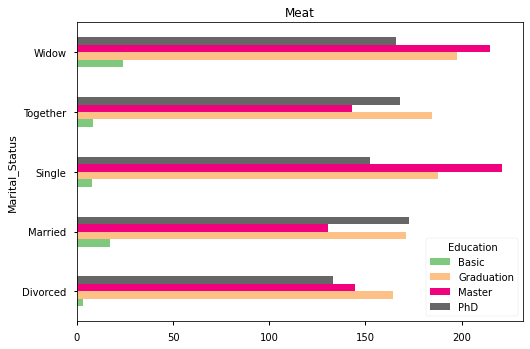

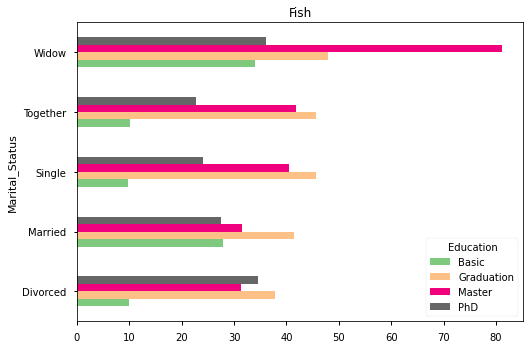

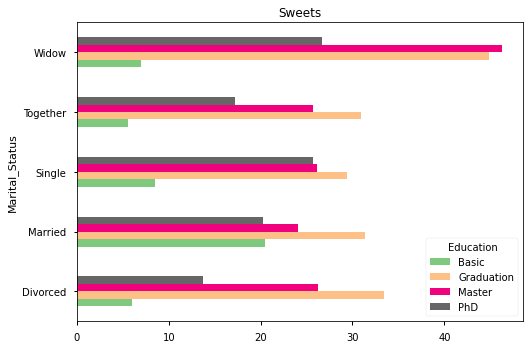

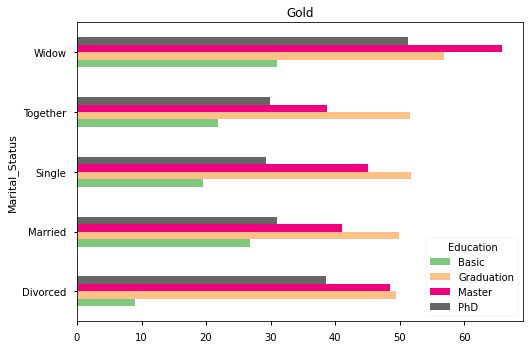

In [52]:
dt_list3 = ['Wines','Fruits','Meat','Fish','Sweets','Gold']

for i in range(len(dt_list3)):
    pd.pivot_table(df,
               index='Marital_Status',
               columns='Education',
               values=dt_list3[i],aggfunc='mean').plot(kind='barh',title=dt_list3[i],colormap='Accent');

####What kind of products have been purchased the most among Income and Education groups?

We can see that high income group always account for high amount in all groups. 
Surprisingly that customer with Low income and Basic education purchase Gold the most while other group purchase none.

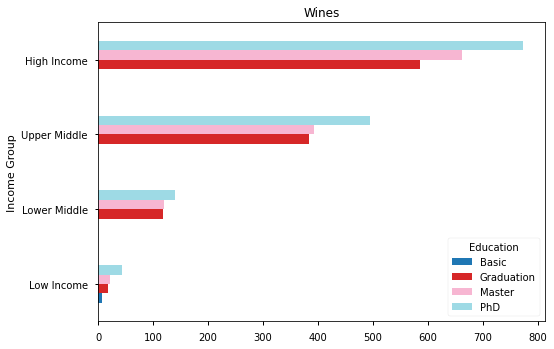

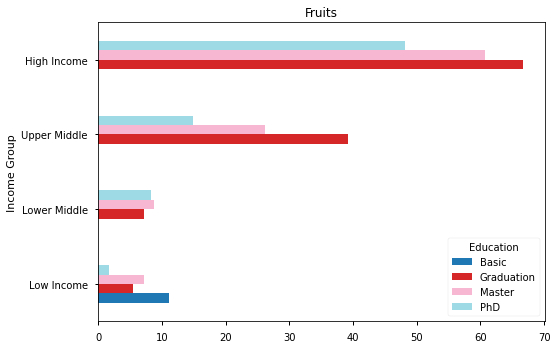

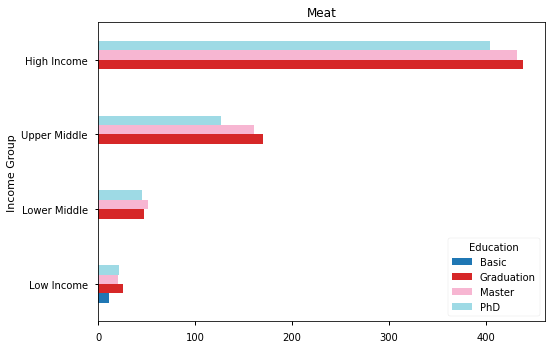

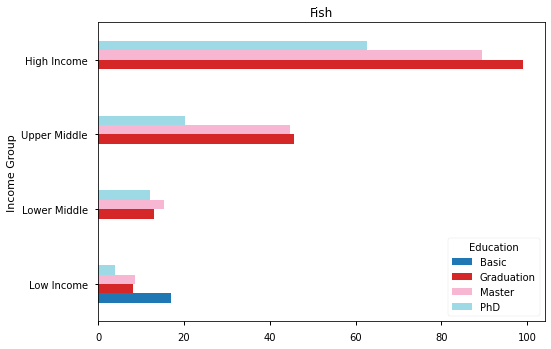

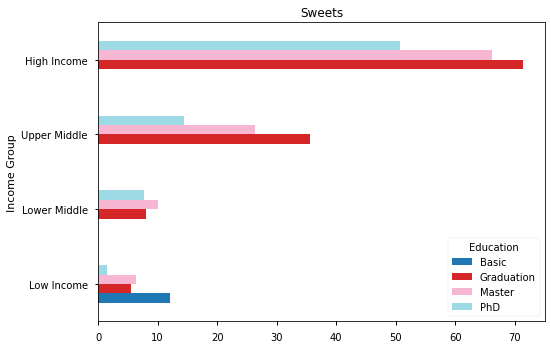

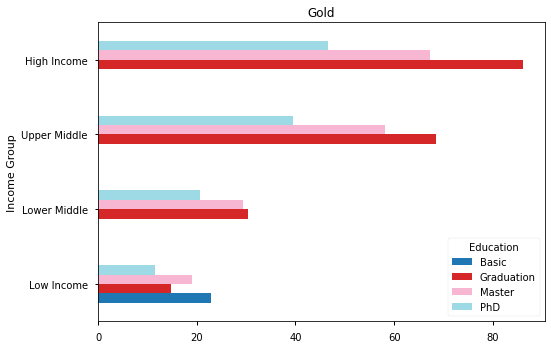

In [48]:
dt_list3 = ['Wines','Fruits','Meat','Fish','Sweets','Gold']

for i in range(len(dt_list3)):
    pd.pivot_table(df,
               index='Income Group',
               columns='Education',
               values=dt_list3[i],aggfunc='mean').plot(kind='barh',
                                                       title=dt_list3[i],
                                                       colormap='tab20',
                                                    #    figsize=(10,6),
                                                       );

##How does the customer purchase through Web, Store, Catalog and purchase with Deals 'look' like?

* We can see here, Low income customers buy more on Deals than High income customer and High income customer buy on Deals the least. Surprisingly Upper Middle customer buy on Deals the most, not the Low income group. 
But High income customer purchases the most through Catalog and store purchase followed by upper middle income customers.

* Store Purchases: other status with High income buy the most, but in Widow status, Upper Middle income customer buy the most

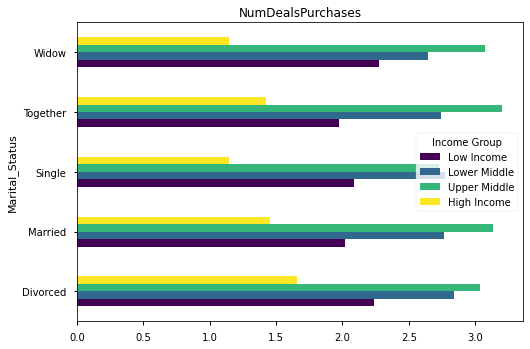

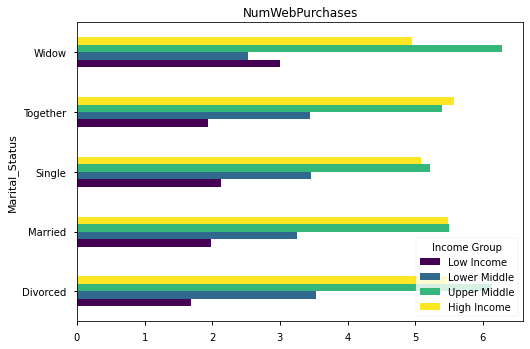

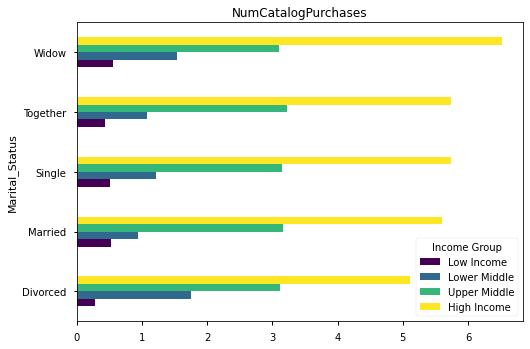

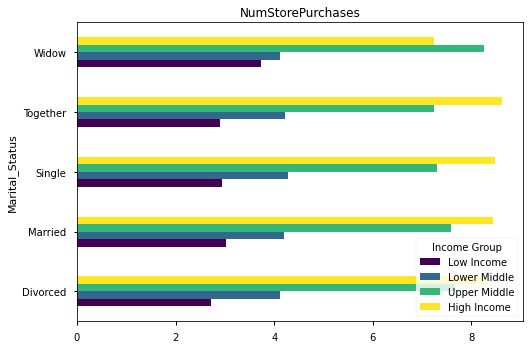

In [50]:
dt_list5 = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

for i in range(len(dt_list5)):
    pd.pivot_table(df,
               index='Marital_Status',
               columns='Income Group',
               values=dt_list5[i],aggfunc='mean').plot(kind='barh',title=dt_list5[i],colormap='viridis');



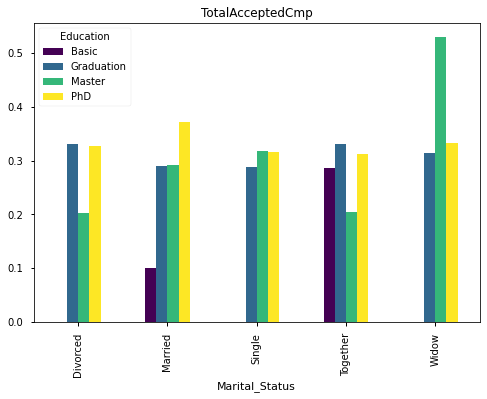

In [42]:
pd.pivot_table(df,
               index='Marital_Status',
               columns='Education',
               values='TotalAcceptedCmp',aggfunc='mean').plot(kind='bar',title='TotalAcceptedCmp',colormap='viridis');

##Monthly enrollment and Percentage change for each month

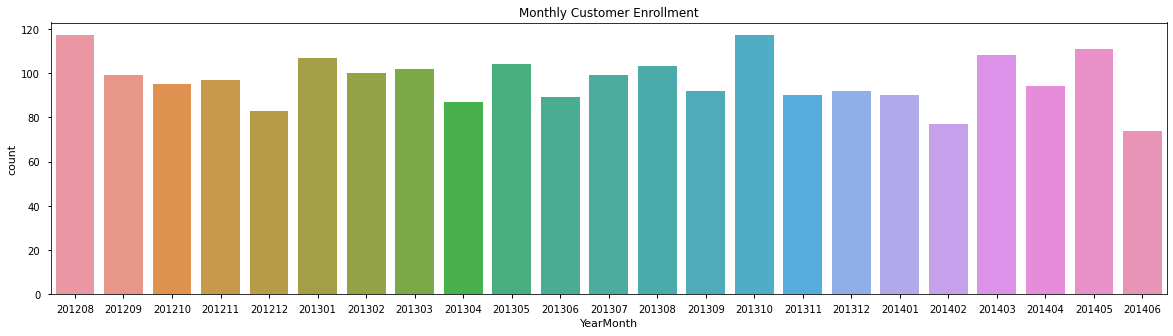

In [52]:
#Monthly Customer Enrollment

# monthly_enroll
plt.figure(figsize=(20,5))
plt.title('Monthly Customer Enrollment')
sns.countplot(data=df,x='YearMonth');

In [50]:
monthly_enroll = df.groupby(['YearMonth']).count()['Age'].reset_index()
monthly_enroll.rename(columns={'Age':'Count'},inplace=True)
monthly_enroll['MonthlyPctChange'] = monthly_enroll['Count'].pct_change()
monthly_enroll['YearMonth'] = monthly_enroll['YearMonth'].apply(str)
monthly_enroll

,YearMonth,Count,MonthlyPctChange
0,201208,117,nan
1,201209,99,-0.15
2,201210,95,-0.04
3,201211,97,0.02
4,201212,83,-0.14
5,201301,107,0.29
6,201302,100,-0.07
7,201303,102,0.02
8,201304,87,-0.15
9,201305,104,0.20


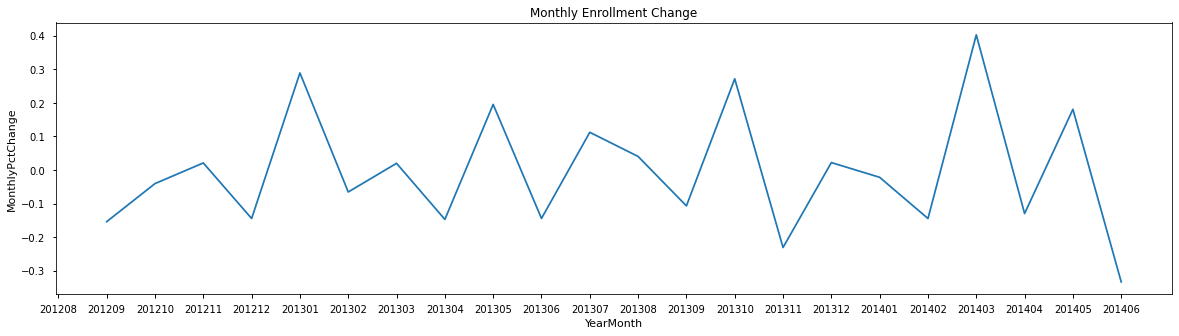

In [51]:
plt.figure(figsize=(20,5))
plt.title('Monthly Enrollment Change')
sns.lineplot(data=monthly_enroll,x='YearMonth',y='MonthlyPctChange');

I can see there's a pattern here that for every 2-3 months, there'll be a drop/growth for customer enrollment of this company. There are two big growth in enrollment in 2013 January (29%) and 2014 March (40%).
Also there're big drops in 2013 November (23%) and 2014 June (33%).


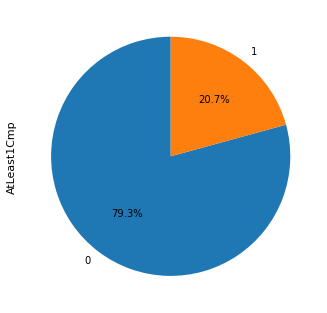

In [29]:
#Propotion of accepting at least 1 campaign
accept_cmp_propotion = df.AtLeast1Cmp.value_counts(normalize=True)
accept_cmp_propotion.plot(kind='pie', autopct='%1.1f%%', startangle=90, fontsize=10)

## Correlation matrix

In [ ]:
df.drop(['YearMonth'],axis=1,inplace=True)

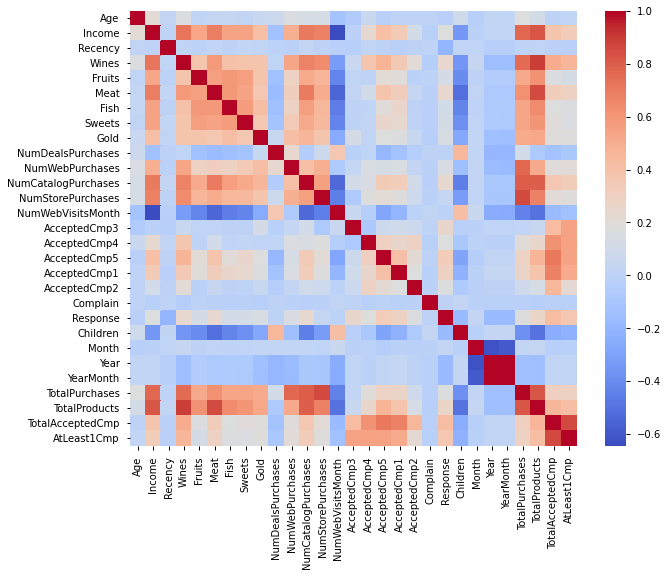

In [33]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm')
plt.show()

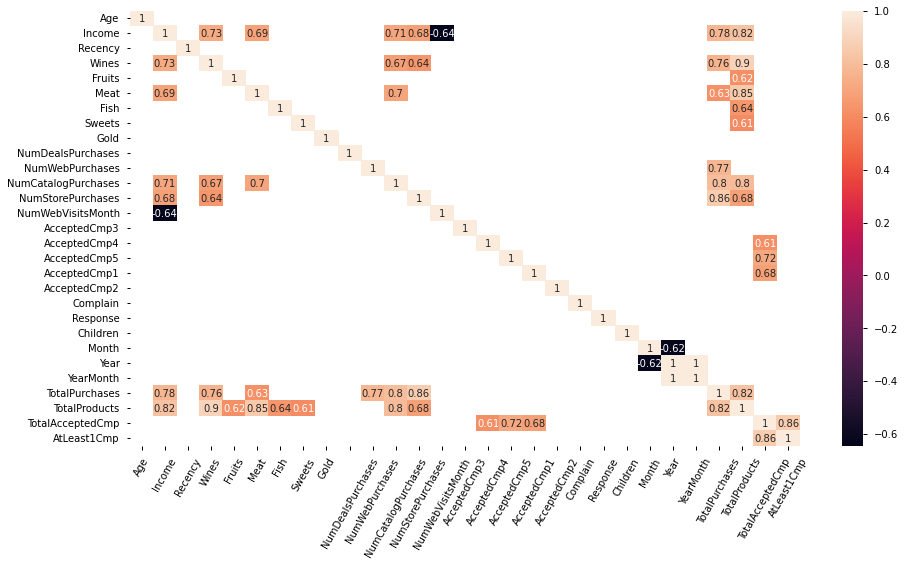

In [47]:
#Correlation map with absolute score >=0.6 (from moderate to strong correlation)
corr = df.corr()
kot = corr[abs(corr)>=0.6]
plt.figure(figsize=(15,8))
sns.heatmap(kot,annot=True)
plt.xticks(rotation=60)
plt.show()

- So we can see from the heatmap, there're several columns have high positive correlation with the **Income** columns:Wines, Meat, NumCatalogPurchases, NumStorePurchases. => The higher Income, the higher amount of Wine & Meat purchased; and these customers will buy more using Catalog or go to store to buy.

- The column **NumCatalogPurchases** also highly positive correlates with Income, Wines, & Meat
- (The column TotalPurchases is the sum of 3 columns NumWebPurchases, NumCatalogPurchases, NumStorePurchases so apparently it's highly positive correlated with Income, Wine and Meat columns)

- There is also 1 moderate negative correlation between NumWebVisitsMonth and Income, the higher Income, the less those customers go visiting Website.



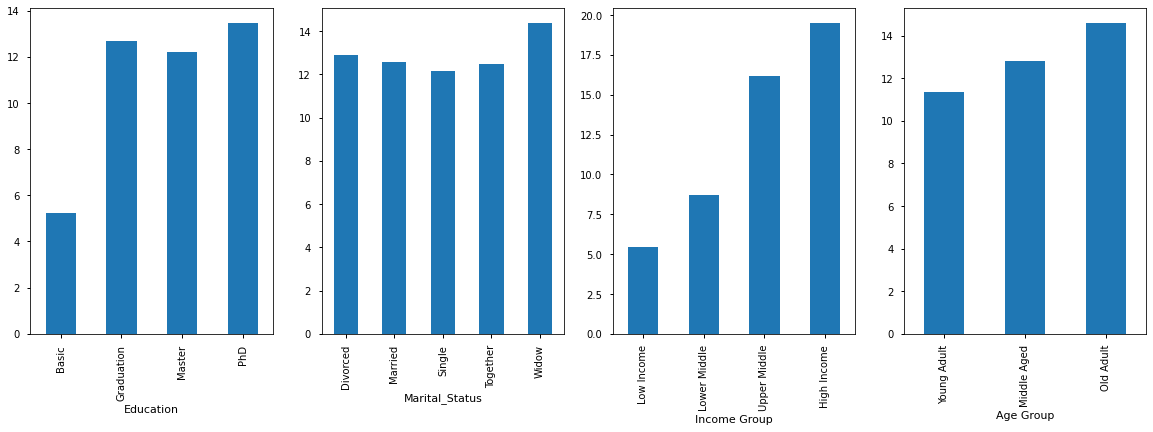

In [41]:
#Trung bình Purchases cho 4 cột Education và Marital_Status, Income Group, Age Group
dt_list4 = ['Education','Marital_Status','Income Group','Age Group']

plt.figure(figsize=(20,6))
for i in range(len(dt_list4)):
    subplot_i=141
    plt.subplot(subplot_i+i)
    plot_edu = df.groupby(dt_list4[i])['TotalPurchases'].mean()
    plot_edu.plot(kind='bar',x='TotalPurchases',y=dt_list4[i])

plt.show()

In [ ]:
df.groupby(['Age Group','Income Group'])['TotalPurchases'].mean().reset_index()

,Age Group,Income Group,TotalPurchases
0,Young Adult,Low Income,5.35
1,Young Adult,Lower Middle,8.44
2,Young Adult,Upper Middle,16.19
3,Young Adult,High Income,19.61
4,Middle Aged,Low Income,5.50
5,Middle Aged,Lower Middle,8.54
6,Middle Aged,Upper Middle,16.34
7,Middle Aged,High Income,19.30
8,Old Adult,Low Income,5.56
9,Old Adult,Lower Middle,10.03


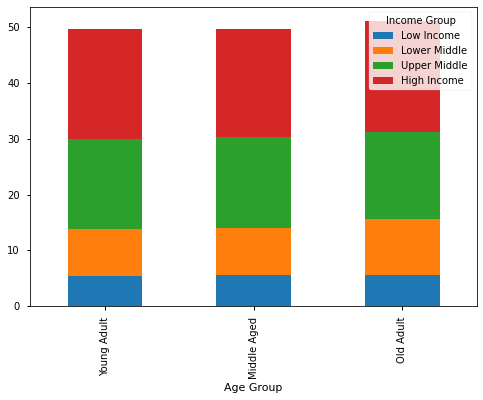

In [ ]:
pd.pivot_table(df,index='Age Group',
               columns='Income Group',
               values='TotalPurchases',
               aggfunc='mean').plot(kind='bar',stacked=True)

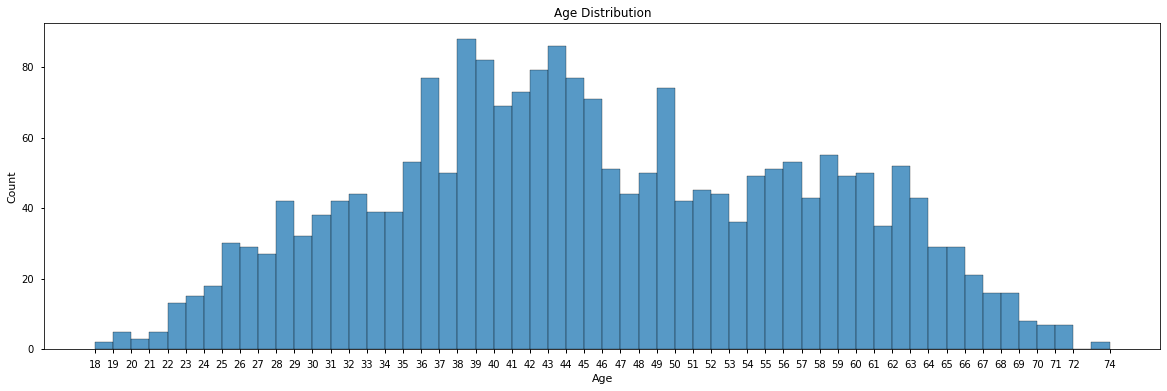

In [ ]:
#Plot Age Range

plt.figure(figsize=(20,6))
plt.title('Age Distribution')
sns.histplot(df['Age'].sort_values(), bins=56)
plt.xticks(np.linspace(df['Age'].min(), df['Age'].max(), 56, dtype=int, endpoint = True))
plt.show()


The age distribution is mostly between 36-50 years old when the customer enrolled with the company

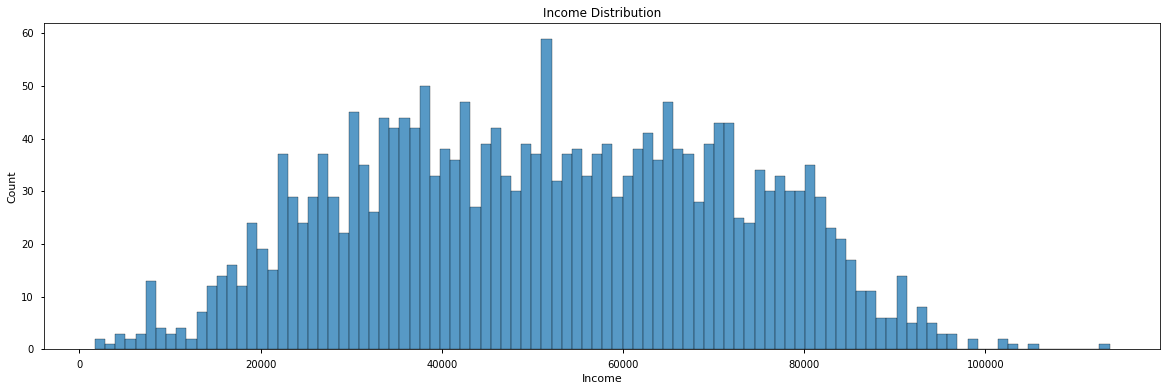

In [ ]:
#Plot Income Range

plt.figure(figsize=(20,6))
plt.title('Income Distribution')
sns.histplot(df['Income'].sort_values(), bins=100)
plt.show()

The Income distribution is mostly between 20k-80k/customer/year

<Figure size 1440x432 with 0 Axes>

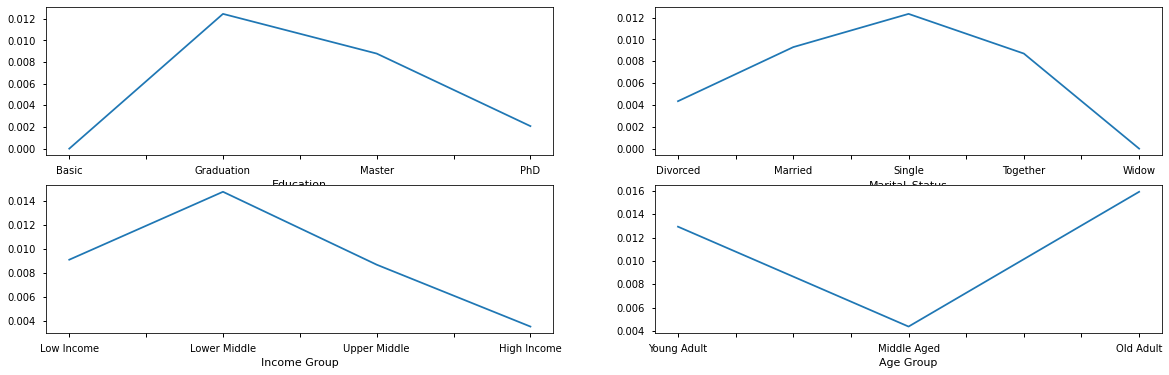

In [46]:
#Plot Complain charts
plt.figure(figsize=(20,6))

dt_list4 = ['Education','Marital_Status','Income Group','Age Group']

plt.figure(figsize=(20,6))
for i in range(len(dt_list4)):
    subplot_i=221
    plt.subplot(subplot_i+i)
    plot_edu = df.groupby(dt_list4[i])['Complain'].mean().plot()
plt.show()

**Income group**
The lower middle group complained the most, but only accounted for 1.4%.=> The customers are quite satisfied with the company's services/products

The least complain group is the High Income group.

**Marital Status**
Single customers complain the most,  but only accounted for 1.2%.

Widow customers have no complain to the company

**Age group**
Young adult has higher complain than old adult, but both are around 1%

**Education**
Customer with Graduation level complains the most with 1.2%

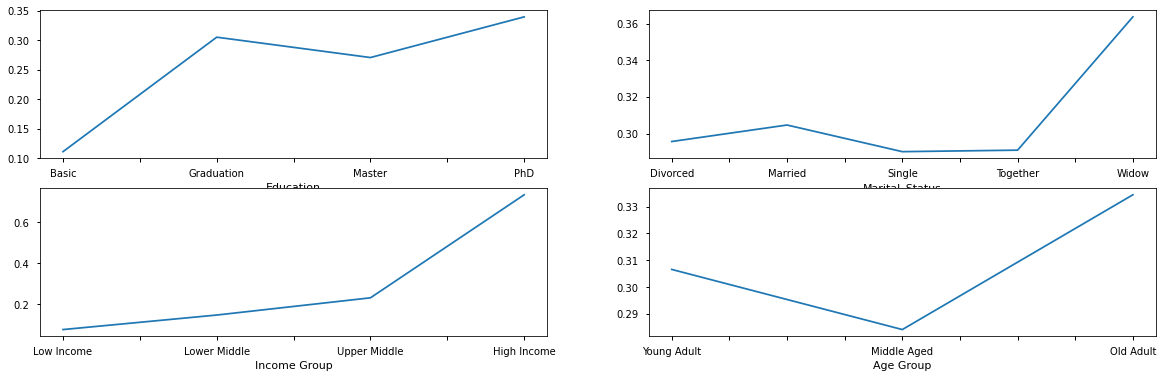

In [45]:
dt_list4 = ['Education','Marital_Status','Income Group','Age Group']

plt.figure(figsize=(20,6))
for i in range(len(dt_list4)):
    subplot_i=221
    plt.subplot(subplot_i+i)
    plot_edu = df.groupby(dt_list4[i])['TotalAcceptedCmp'].mean().plot()
    
plt.show()

The groups accept campaigns the most are High Income (60%), Widow(36%), Old Adult(35%) and PhD (35%)

## Campaign

The campaign 2 is extremely lower than other campaigns so the marketing team might want to review this campaign's effectness

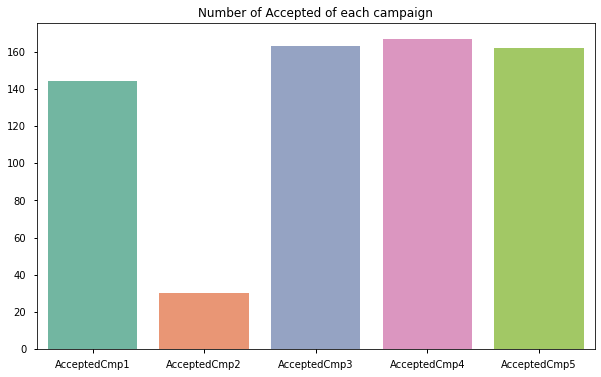

In [39]:
# Analyse the acceptance of each level of the campaign
acceptedConcat = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
acceptedConcat = acceptedConcat.apply(pd.DataFrame.sum)


plt.figure(figsize=(10,6))
plt.title('Number of Accepted of each campaign')
sns.barplot(x=acceptedConcat.index, y=acceptedConcat,palette='Set2')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Number of Accepted of each campaign')
sns.barplot(x=acceptedConcat.index, y=acceptedConcat,palette='Set2')
plt.show()

#Customer Segmentation - Clustering by KMEANS

##Recency

In [73]:
user_recency = df.loc[:,['ID','Recency']]
user_recency.head()

,ID,Recency
0,5524,58
1,2174,38
2,4141,26
3,6182,26
4,5324,94


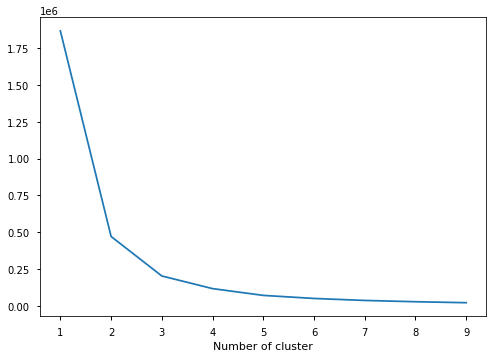

In [74]:
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_recency[['Recency']])
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [75]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(user_recency[['Recency']])
user_recency['RecencyCluster'] = kmeans.predict(user_recency[['Recency']])

In [76]:
user_recency.head()

,ID,Recency,RecencyCluster
0,5524,58,1
1,2174,38,1
2,4141,26,2
3,6182,26,2
4,5324,94,0


In [77]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

user_recency = order_cluster('RecencyCluster', 'Recency',user_recency,False)

In [78]:
user_recency

,ID,Recency,RecencyCluster
0,5524,58,1
1,2174,38,1
2,965,34,1
3,387,59,1
4,8180,53,1
...,...,...,...
2222,4478,87,0
2223,7004,82,0
2224,9817,71,0
2225,8372,81,0


In [79]:
user_recency.groupby('RecencyCluster').Recency.describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,725.00,82.91,9.36,67.00,75.00,83.00,91.00,99.00
1,744.00,49.94,9.55,33.00,42.00,50.00,57.00,66.00
2,758.00,15.95,9.79,0.00,8.00,16.00,25.00,32.00


Higher score for Recency (0-2) => better customers (as their inactive time is low).

Customer with Recency Cluster  score 2 is better than customer with score 0

##Total Purchases

In [80]:
user_totalpurchases = df.loc[:,['ID','TotalPurchases']]
user_totalpurchases.head()

,ID,TotalPurchases
0,5524,22
1,2174,4
2,4141,20
3,6182,6
4,5324,14


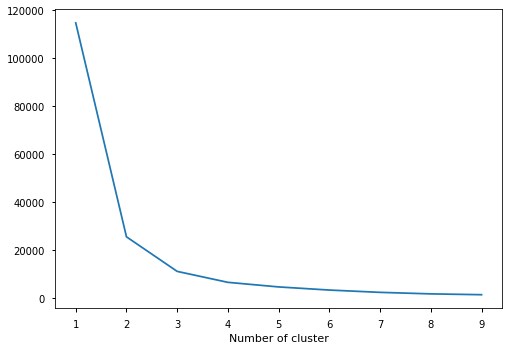

In [81]:
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_totalpurchases[['TotalPurchases']])
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [82]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(user_totalpurchases[['TotalPurchases']])
kmeans_prediction = kmeans.predict(user_totalpurchases[['TotalPurchases']])

# You need to save the predictions of kmeans to a variable named 'kmeans_prediction'
user_totalpurchases['PurchasesCluster'] = kmeans_prediction
#order the cluster numbers
user_totalpurchases = order_cluster('PurchasesCluster', 'TotalPurchases',user_totalpurchases,True)

#show details of the dataframe
user_totalpurchases.groupby('PurchasesCluster').TotalPurchases.describe()

,count,mean,std,min,25%,50%,75%,max
PurchasesCluster,,,,,,,,
0,932.00,5.30,1.70,0.00,4.00,5.00,6.00,9.00
1,743.00,14.42,2.52,10.00,12.00,15.00,17.00,18.00
2,552.00,22.24,2.65,19.00,20.00,22.00,24.00,32.00


## Income

In [83]:
user_income = df.loc[:,['ID','Income']]
user_income.head()

,ID,Income
0,5524,58138.00
1,2174,46344.00
2,4141,71613.00
3,6182,26646.00
4,5324,58293.00


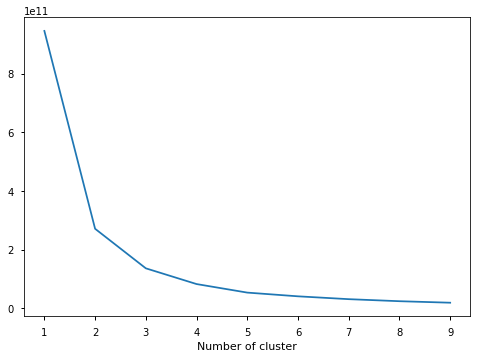

In [84]:
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_income[['Income']])
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [85]:
#Choose number of cluster = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(user_income[['Income']])
kmeans_prediction = kmeans.predict(user_income[['Income']])

# You need to save the predictions of kmeans to a variable named 'kmeans_prediction'
user_income['IncomeCluster'] = kmeans_prediction
#order the cluster numbers
user_income = order_cluster('IncomeCluster', 'Income',user_income,True)

#show details of the dataframe
user_income.groupby('IncomeCluster').Income.describe()

,count,mean,std,min,25%,50%,75%,max
IncomeCluster,,,,,,,,
0,423.00,22626.69,6600.83,1730.00,18841.50,23661.00,27846.00,31395.00
1,627.00,40380.66,5172.50,31454.00,35908.50,40233.00,44856.50,49669.00
2,642.00,59143.26,5609.38,49678.00,54201.00,59147.50,64071.00,68805.00
3,535.00,78688.88,7129.00,69016.00,72635.00,77845.00,82573.50,113734.00


## Calculate RPI (Recency - Total Purchases - Income) score for each customer

In [86]:
final_rpi = pd.merge(user_recency, user_totalpurchases, on='ID')
final_rpi = pd.merge(final_rpi, user_income, on='ID')
final_rpi.head()

,ID,Recency,RecencyCluster,TotalPurchases,PurchasesCluster,Income,IncomeCluster
0,5524,58,1,22,2,58138.00,2
1,2174,38,1,4,0,46344.00,1
2,965,34,1,17,1,55635.00,2
3,387,59,1,5,0,7500.00,0
4,8180,53,1,12,1,59354.00,2


In [87]:
# calculate Final RPI score, because TotalPurchases is more important so I'll multiply this score by 2
final_rpi['RPI_score'] = final_rpi.RecencyCluster + final_rpi.PurchasesCluster*2 + final_rpi.IncomeCluster
final_rpi.head()

,ID,Recency,RecencyCluster,TotalPurchases,PurchasesCluster,Income,IncomeCluster,RPI_score
0,5524,58,1,22,2,58138.00,2,7
1,2174,38,1,4,0,46344.00,1,2
2,965,34,1,17,1,55635.00,2,5
3,387,59,1,5,0,7500.00,0,1
4,8180,53,1,12,1,59354.00,2,5


In [88]:
final_rpi.groupby('RPI_score')[['Recency','TotalPurchases','Income']].mean()

,Recency,TotalPurchases,Income
RPI_score,,,
0,82.72,5.15,22544.58
1,66.20,5.20,31195.14
2,39.85,5.36,33443.94
3,35.23,7.28,41884.85
4,62.13,12.89,52891.78
5,52.27,14.75,59586.23
6,45.10,17.18,64201.41
7,52.49,20.12,73121.73
8,35.49,22.41,71367.14


As we can see here, RPI score from 7 indicates the best customer while 0 is the worst. I'll divide into 3 groups:
- Score from 0 - 3: Low Value
- Score from 4 - 6: Mid Value
- Score from 7 - 9: High Value

In [89]:
final_rpi['Segmentation'] = 'Low'
final_rpi.loc[final_rpi.RPI_score>3,'Segmentation']='Mid'
final_rpi.loc[final_rpi.RPI_score>6,'Segmentation']='High'
final_rpi.head()

,ID,Recency,RecencyCluster,TotalPurchases,PurchasesCluster,Income,IncomeCluster,RPI_score,Segmentation
0,5524,58,1,22,2,58138.00,2,7,High
1,2174,38,1,4,0,46344.00,1,2,Low
2,965,34,1,17,1,55635.00,2,5,Mid
3,387,59,1,5,0,7500.00,0,1,Low
4,8180,53,1,12,1,59354.00,2,5,Mid


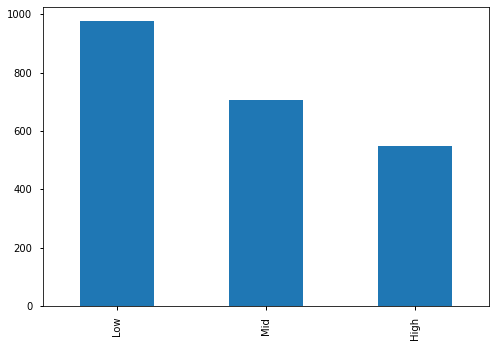

In [90]:
final_rpi.Segmentation.value_counts().plot(kind='bar');

##Visualizing the clusters

The division is quite clear between the 3 segments
* Total Purchases and Recency: Low group tends to have less than 10 purchases while High group's total purchases above 20. There are some points that High group with low Recency got total purchases from 10 to 20 and Mid group with high Recency got total purchases from 20 to 25.

* Total Purchases and Income: there is a positive correlation between these value as I mentioned in Correlation matrix above. The High group purchases the most with high income and vice versa with the Low group

* Recency and Income: 3 groups spread evenly on the Recency column and quite mixed on the Income column.

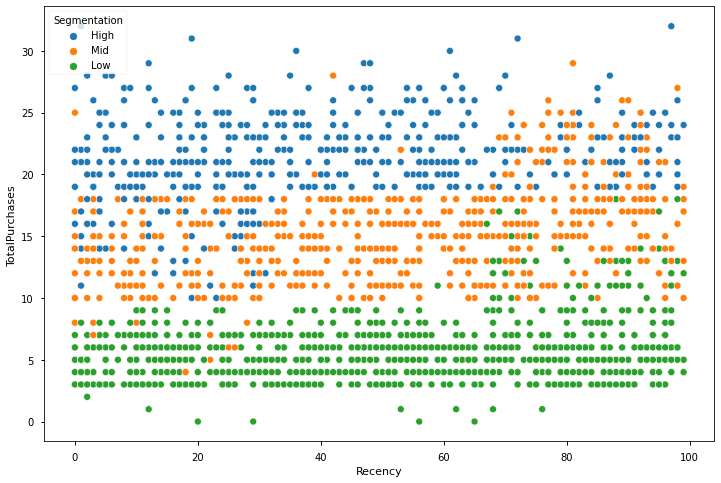

In [91]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=final_rpi, x="Recency", y="TotalPurchases", hue="Segmentation",hue_order= ['High', 'Mid','Low']);

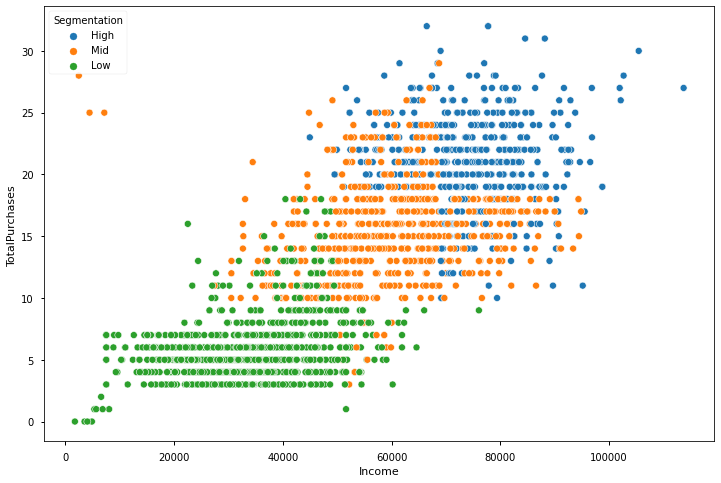

In [92]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=final_rpi, x="Income", y="TotalPurchases", hue="Segmentation",hue_order= ['High', 'Mid','Low']);

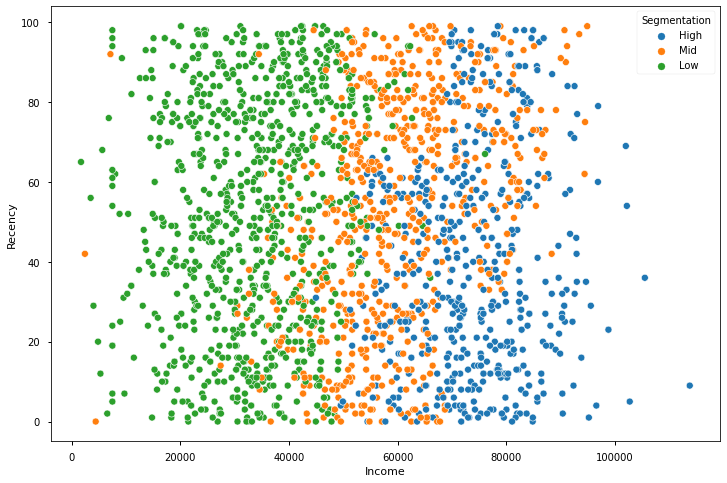

In [93]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=final_rpi, x="Income", y="Recency", hue="Segmentation",hue_order= ['High', 'Mid','Low']);